# Bài toán dự đoán giá cổ phiếu (Closing Price)

## Định nghĩa bài toán 

### Khai báo thư viện

In [461]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Đọc tập dữ liệu 

In [ ]:
df = pd.read_csv('Task02/NSE-TATAGLOBAL.csv', parse_dates=['Date'], index_col='Date')

### 5 dòng dữ liệu đầu tiên 

In [463]:
df.head()

Open    High     Low    Last   Close  Total Trade Quantity  \
Date                                                                       
2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   

            Turnover (Lacs)  
Date                         
2018-09-28          7162.35  
2018-09-27         11859.95  
2018-09-26          5248.60  
2018-09-25          5503.90  
2018-09-24          7999.55

### Thông tin cơ bản của dữ liệu 

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2 KB


In [465]:
df.describe()

Open         High          Low         Last       Close  \
count  2035.000000  2035.000000  2035.000000  2035.000000  2035.00000   
mean    149.713735   151.992826   147.293931   149.474251   149.45027   
std      48.664509    49.413109    47.931958    48.732570    48.71204   
min      81.100000    82.800000    80.000000    81.000000    80.95000   
25%     120.025000   122.100000   118.300000   120.075000   120.05000   
50%     141.500000   143.400000   139.600000   141.100000   141.25000   
75%     157.175000   159.400000   155.150000   156.925000   156.90000   
max     327.700000   328.750000   321.650000   325.950000   325.75000   

       Total Trade Quantity  Turnover (Lacs)  
count          2.035000e+03      2035.000000  
mean           2.335681e+06      3899.980565  
std            2.091778e+06      4570.767877  
min            3.961000e+04        37.040000  
25%            1.146444e+06      1427.460000  
50%            1.783456e+06      2512.030000  
75%            2.813594e+06      4539.015000  
max            2.919102e+07     55755.080000

In [466]:
print(df.shape)

(2035, 7)


## Tiền xử lí dữ liệu

### Kiểm tra dữ liệu rỗng 

In [467]:
df.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [468]:
names = df.columns
print(names)

Index(['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')


In [469]:
import matplotlib.pyplot as plt

### Kiểm tra ngoại lệ 

In [470]:
columns_to_plot = ['Open', 'High', 'Low', 'Close']
df[columns_to_plot].plot(kind='box', figsize=(10, 6))
plt.title('Boxplot of Price Data')
plt.grid(True, linestyle='--', alpha=0.7) 
plt.show()

In [471]:
import pandas_ta as ta

### Các giá trị thêm 

In [472]:
# Moving averages
df['MA7'] = df['Close'].rolling(window=7).mean()

df['Close_mean30'] = df['Close'].rolling(window=30).mean()

# Temporal features - day of week with cyclical encoding
df['day_of_week'] = df.index.dayofweek
df['day_sin'] = np.sin(df['day_of_week'] * (2 * np.pi / 7))
df['day_cos'] = np.cos(df['day_of_week'] * (2 * np.pi / 7))

# Month with cyclical encoding
df['month'] = df.index.month
df['month_sin'] = np.sin(df['month'] * (2 * np.pi / 12))
df['month_cos'] = np.cos(df['month'] * (2 * np.pi / 12))

# Add difference features (momentum indicators)
df['close_diff1'] = df['Close'].diff(1)
df['close_diff5'] = df['Close'].diff(5)
df['close_diff20'] = df['Close'].diff(20)

# Drop rows with NaN from rolling calculations
df = df.dropna()

In [473]:
df.iloc[:, 7:].head()

MA7  Close_mean30  day_of_week   day_sin   day_cos  month  \
Date                                                                           
2018-08-14  238.864286    232.683333            1  0.781831  0.623490      8   
2018-08-13  239.371429    232.710000            0  0.000000  1.000000      8   
2018-08-10  239.100000    232.720000            4 -0.433884 -0.900969      8   
2018-08-09  238.635714    232.821667            3  0.433884 -0.900969      8   
2018-08-08  237.378571    232.830000            2  0.974928 -0.222521      8   

            month_sin  month_cos  close_diff1  close_diff5  close_diff20  
Date                                                                      
2018-08-14  -0.866025       -0.5        -1.80          2.1          3.60  
2018-08-13  -0.866025       -0.5        -3.00         -6.0         11.90  
2018-08-10  -0.866025       -0.5        -1.00        -11.6         17.55  
2018-08-09  -0.866025       -0.5         3.75         -5.7         15.30  
2018-08-08  -0.866025       -0.5        -0.95         -3.0         13.40

In [474]:
names = df.columns
print(names)

Index(['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)', 'MA7', 'Close_mean30', 'day_of_week', 'day_sin',
       'day_cos', 'month', 'month_sin', 'month_cos', 'close_diff1',
       'close_diff5', 'close_diff20'],
      dtype='object')


## Trực quan hóa dữ liệu 

In [475]:
import seaborn as sns

In [476]:
cols_plot = ['Open','High','Low','Last','Close']

### Giá mở, Giá cao nhất, thấp nhất, Giá cuối cùng được mua, giá đóng

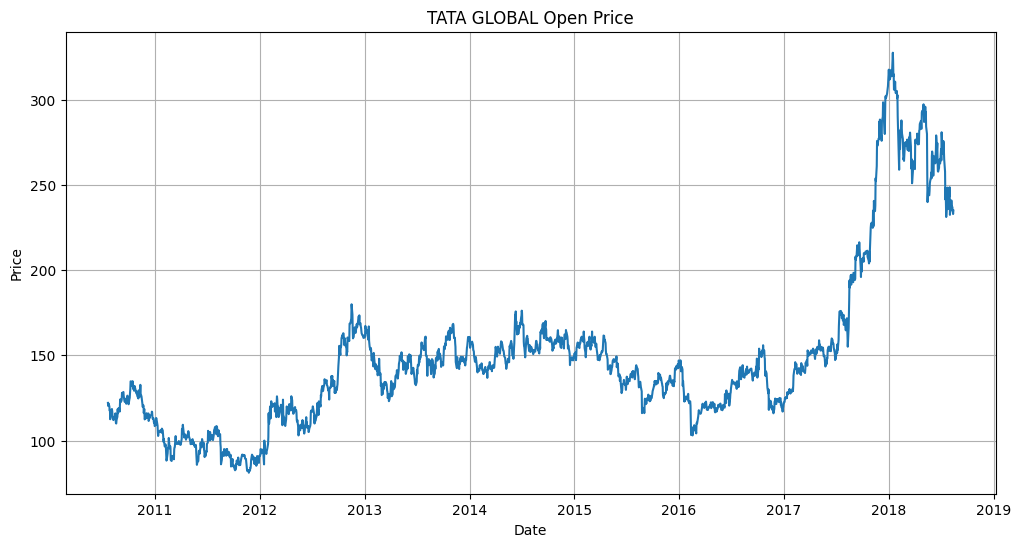

In [477]:
for column in cols_plot:
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[f'{column}'])
    plt.title(f'TATA GLOBAL {column} Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

### Trung bình động 

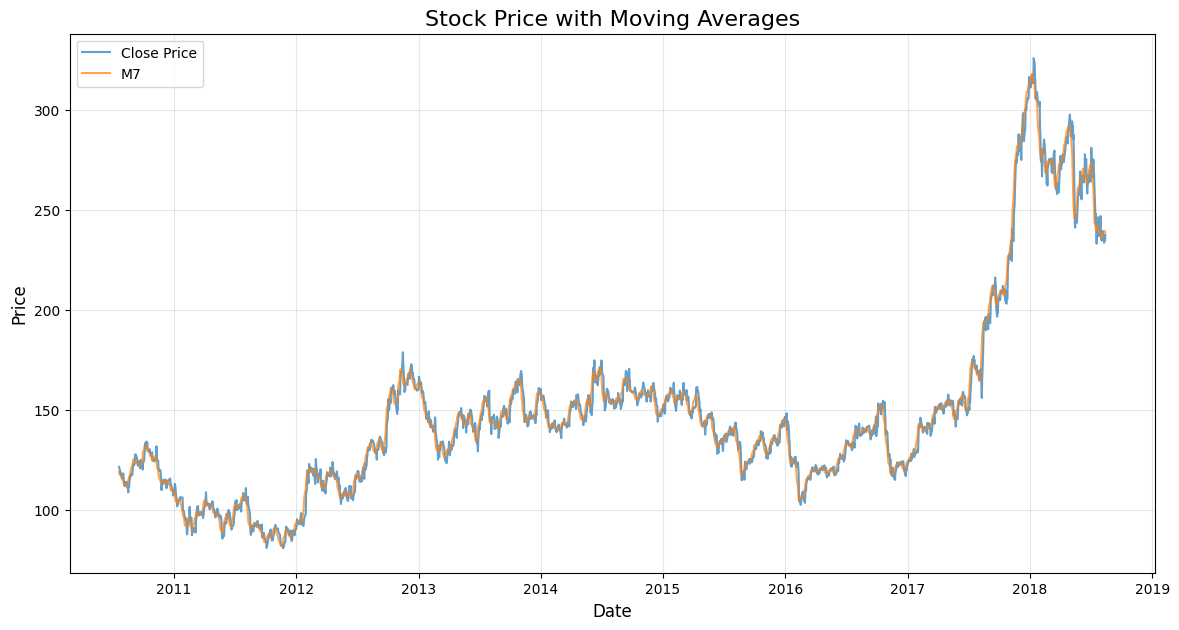

In [478]:
# Plot original Close price with MA5, MA20, MA50
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', alpha=0.7)
plt.plot(df.index, df['MA7'], label='M7', alpha=0.7)
# plt.plot(df.index, df['MA20'], label='MA20', alpha=0.7)
# plt.plot(df.index, df['MA50'], label='MA50', alpha=0.7)
plt.title('Stock Price with Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Khai báo hàm dùng cho việc vẽ 'đường cong' quá trình học 

In [479]:
from sklearn.model_selection import learning_curve

In [480]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score (Negative MSE)")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

## Xử lí dữ liệu 

In [481]:
X = df.drop(columns=['Close'])
y = df['Close']

In [482]:
# Time-based train-test split (80% train, 20% test)
train_size = int(len(df) * 0.8)

In [483]:
# Training and testing datasets
X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]
X_test = X.iloc[train_size:]
y_test = y.iloc[train_size:]

In [484]:
from sklearn.preprocessing import StandardScaler

In [485]:
# Train-validation split for neural networks (within the training set)
val_size = int(len(X_train) * 0.2)
X_val = X_train.iloc[-val_size:]
X_train_nn = X_train.iloc[:-val_size]
y_val = y_train.iloc[-val_size:]
y_train_nn = y_train.iloc[:-val_size]

X_train_values = X_train.values
X_test_values = X_test.values
X_train_nn_values = X_train_nn.values
X_val_values = X_val.values

# Scale features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_values)
X_test_scaled = scaler.transform(X_test_values)
X_train_nn_scaled = scaler.transform(X_train_nn_values)
X_val_scaled = scaler.transform(X_val_values)

## Lựa chọn mô hình 

In [486]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Decision Tree

In [487]:
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [5, 10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

In [ ]:
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), 
                          param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get best parameters
best_dt = grid_search.best_estimator_

DecisionTreeRegressor(max_depth=15, random_state=42)


In [489]:
best_dt.fit(X_train, y_train)
y_pred_dt = best_dt.predict(X_test)

In [490]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt = mean_absolute_error(y_test, y_pred_dt)

In [491]:
print(f"Decision Tree - Test RMSE: {rmse_dt:.2f}")
print(f"Decision Tree - Test MAE: {mae_dt:.2f}")

Decision Tree - Test RMSE: 9.28
Decision Tree - Test MAE: 6.43


In [492]:
plt.figure(figsize=(10, 6))
metrics = ['RMSE', 'MAE']
values = [ rmse_dt, mae_dt]

# Creating bar chart
bars = plt.bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Decision Tree Regression Error Metrics', fontsize=15)
plt.ylabel('Error Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontsize=11)

plt.show()

In [493]:
plt.figure(figsize=(12, 8))
feature_importance = pd.DataFrame({
    'feature': X.columns,  # Use X.columns instead of names
    'importance': best_dt.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (Decision Tree)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

In [494]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue', alpha=0.7)
plt.plot(y_test.index, y_pred_dt, label='Predicted (DT)', color='red', alpha=0.7)
plt.title('Actual vs Predicted Stock Prices (Decision Tree)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

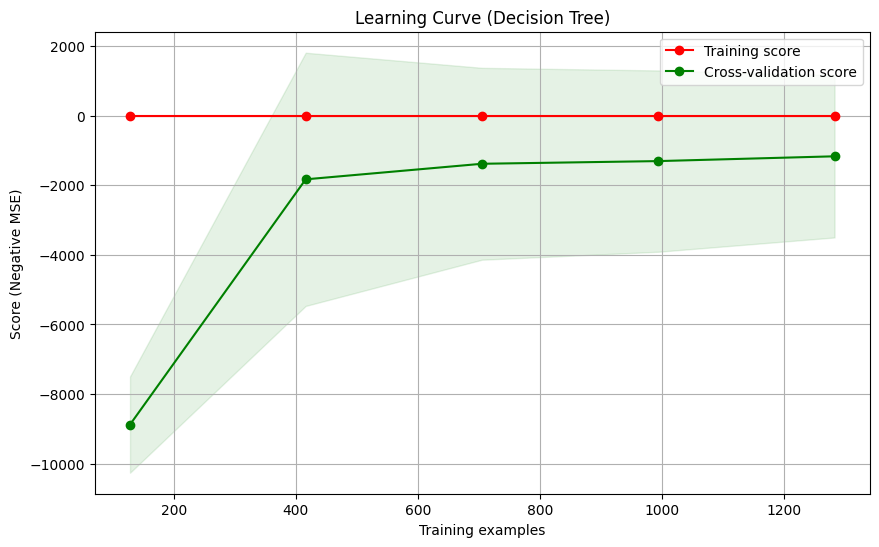

In [495]:
plot_learning_curve(best_dt, "Learning Curve (Decision Tree)", X_train, y_train)
plt.show()

### Gradient Boosting

In [496]:
from sklearn.ensemble import GradientBoostingRegressor

In [497]:
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, 
                                     max_depth=10, min_samples_leaf=15,
                                     random_state=42)
gbr_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=10, min_samples_leaf=15, random_state=42)

In [498]:
y_pred_gb_train = gbr_model.predict(X_train_scaled)
y_pred_gb = gbr_model.predict(X_test_scaled)

In [499]:
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
mae_gb = mean_absolute_error(y_test, y_pred_gb)

In [500]:
print(f"Gradient Boosting - Test RMSE: {rmse_gb:.2f}")
print(f"Gradient Boosting - Test MAE: {mae_gb:.2f}")

Gradient Boosting - Test RMSE: 9.51
Gradient Boosting - Test MAE: 6.60


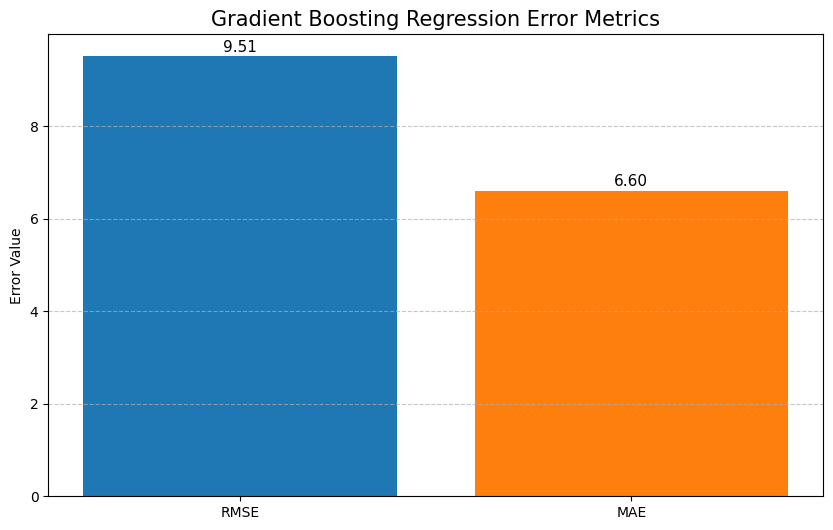

In [501]:
plt.figure(figsize=(10, 6))
metrics = ['RMSE', 'MAE']
values = [ rmse_gb, mae_gb]

# Creating bar chart
bars = plt.bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Gradient Boosting Regression Error Metrics', fontsize=15)
plt.ylabel('Error Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontsize=11)

plt.show()

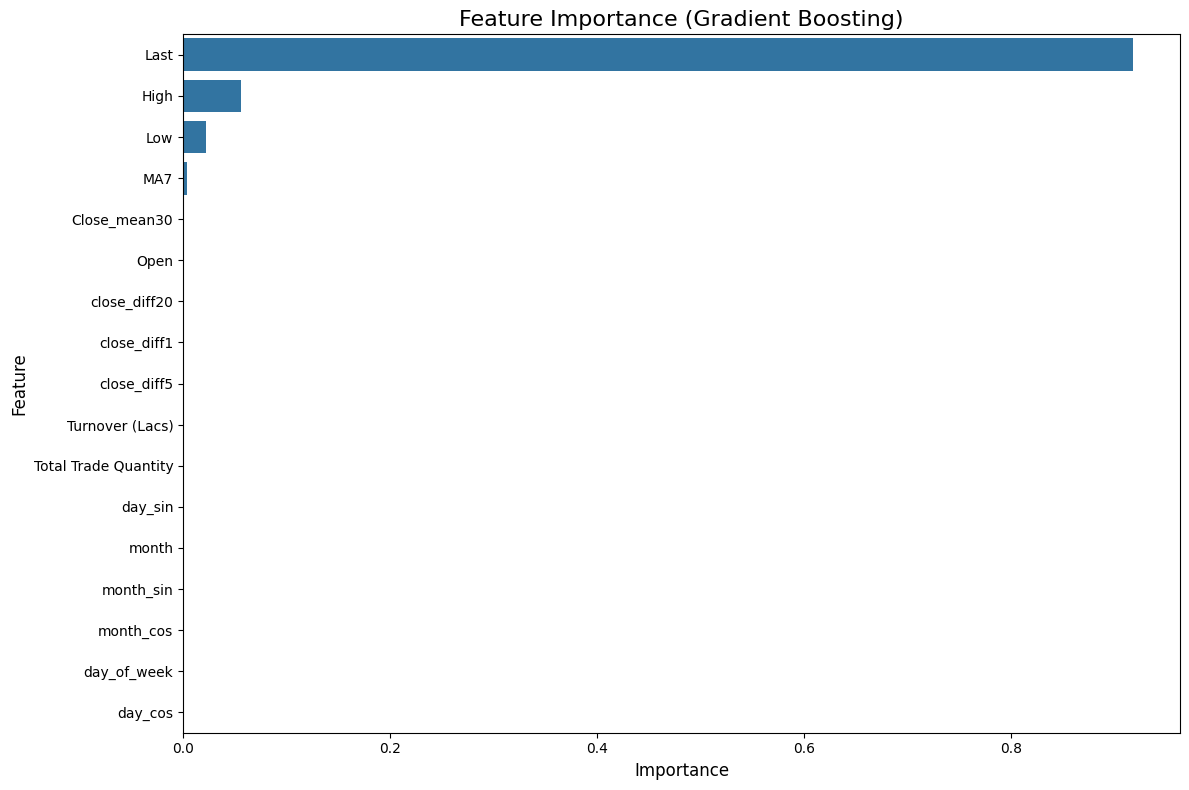

In [502]:
plt.figure(figsize=(12, 8))
feature_importance = pd.DataFrame({
    'feature': X.columns,  # Use X.columns instead of names
    'importance': gbr_model.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (Gradient Boosting)', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

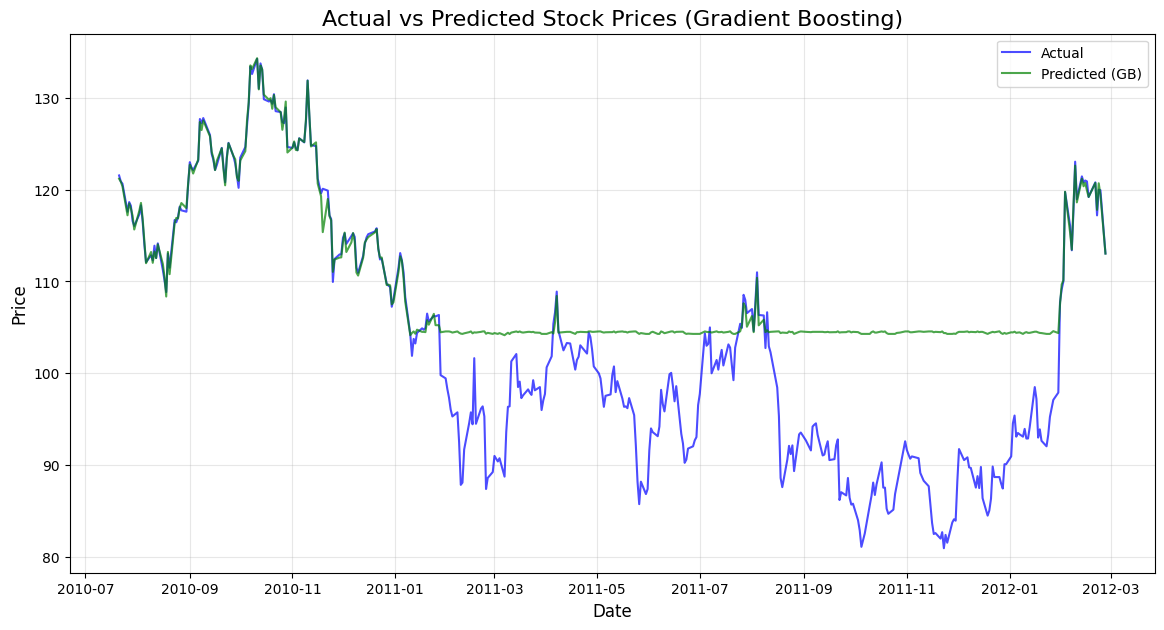

In [503]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue', alpha=0.7)
plt.plot(y_test.index, y_pred_gb, label='Predicted (GB)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Stock Prices (Gradient Boosting)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

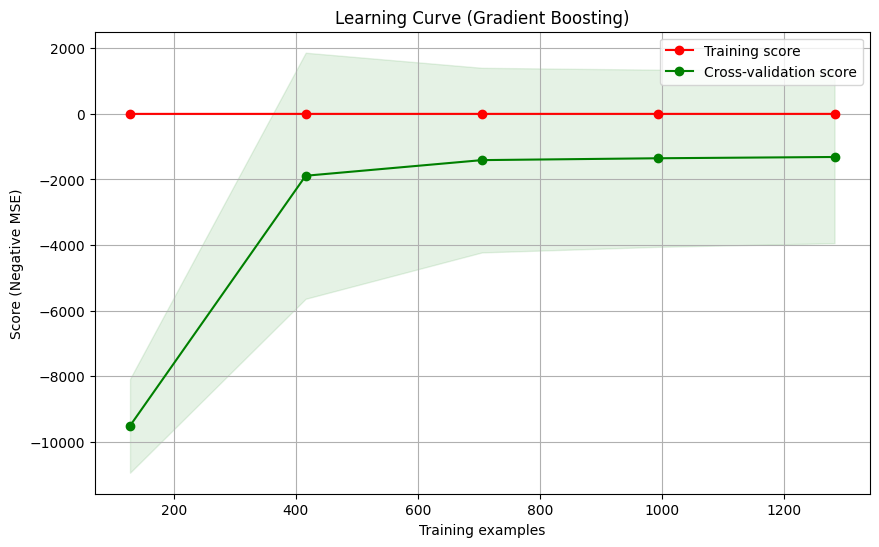

In [504]:
plot_learning_curve(gbr_model, "Learning Curve (Gradient Boosting)", X_train, y_train)
plt.show()

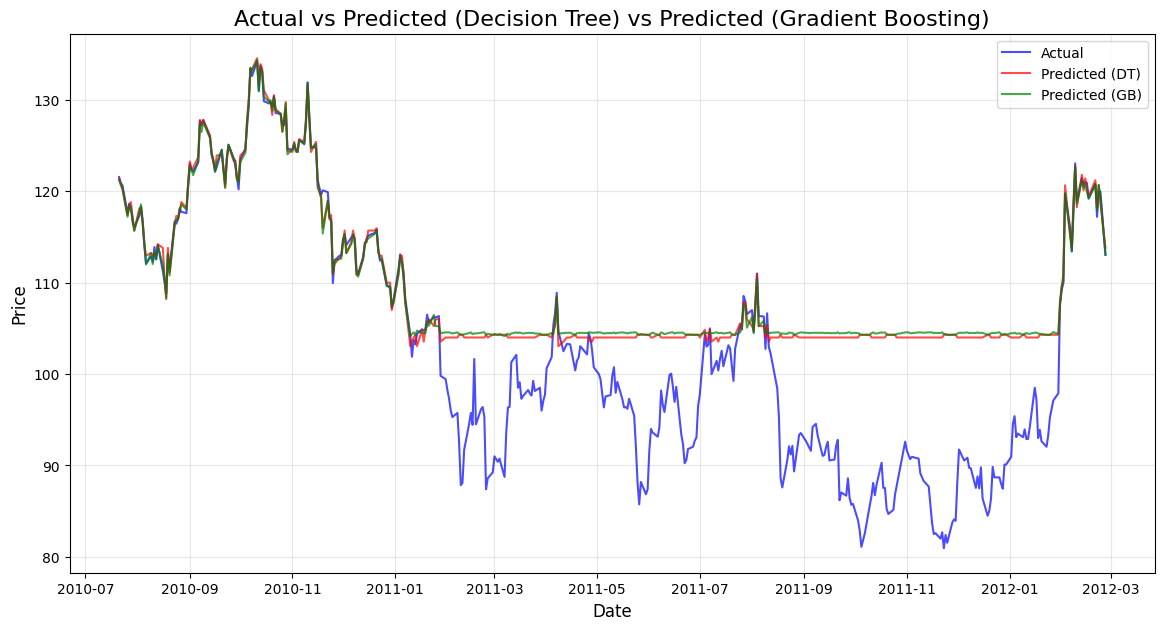

In [523]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue', alpha=0.7)
plt.plot(y_test.index, y_pred_dt, label='Predicted (DT)', color='red', alpha=0.7)
plt.plot(y_test.index, y_pred_gb, label='Predicted (GB)', color='green', alpha=0.7)
plt.title('Actual vs Predicted (Decision Tree) vs Predicted (Gradient Boosting)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [524]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler

In [525]:
y_scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))
y_train_nn_scaled = y_scaler.transform(y_train_nn.values.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.values.reshape(-1, 1))

### Multi Layers Prceptron (MLP)

In [526]:
mlp_model = Sequential([
    # First layer (similar to first LSTM but for tabular data)
    Dense(50, activation='relu', input_shape=(X_train_nn_scaled.shape[1],)),
    
    Dense(50, activation='relu'),
    
    Dense(50, activation='relu'),
    
    # Output layer
    Dense(1)
])

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [527]:
# Compile model
mlp_model.compile(loss='mean_squared_error', optimizer='adam')
mlp_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 50)             │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,051 (23.64 KB)

 Trainable params: 6,051 (23.64 KB)

 Non-trainable params: 0 (0.00 B)

In [528]:
early_stopping_mlp = EarlyStopping(
    monitor='val_loss', 
    patience=50,
    restore_best_weights=True,
    verbose=1
)

reduce_lr_mlp = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    min_lr=0.0001,
    verbose=1
)

In [529]:
mlp_history = mlp_model.fit(
    X_train_nn_scaled, y_train_nn_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping_mlp, reduce_lr_mlp],
    verbose=1
)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - loss: 0.0415 - val_loss: 0.0081 - learning_rate: 0.0010
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0068 - val_loss: 0.0044 - learning_rate: 0.0010
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0039 - val_loss: 0.0032 - learning_rate: 0.0010
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0025 - val_loss: 0.0027 - learning_rate: 0.0010
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0020 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0016 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0014 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0012 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0017 - val_loss: 0.0017 - learning_rate: 0.0010
Epoch 10

In [530]:
# Predictions
y_pred_mlp_train_scaled = mlp_model.predict(X_train_scaled)
y_pred_mlp_scaled = mlp_model.predict(X_test_scaled)

51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [531]:
y_pred_mlp_train = y_scaler.inverse_transform(y_pred_mlp_train_scaled).flatten()
y_pred_mlp = y_scaler.inverse_transform(y_pred_mlp_scaled).flatten()

In [532]:
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

In [533]:
print(f"MLP - Test RMSE: {rmse_mlp:.2f}")
print(f"MLP - Test MAE: {mae_mlp:.2f}")

MLP - Test RMSE: 10.78
MLP - Test MAE: 7.58


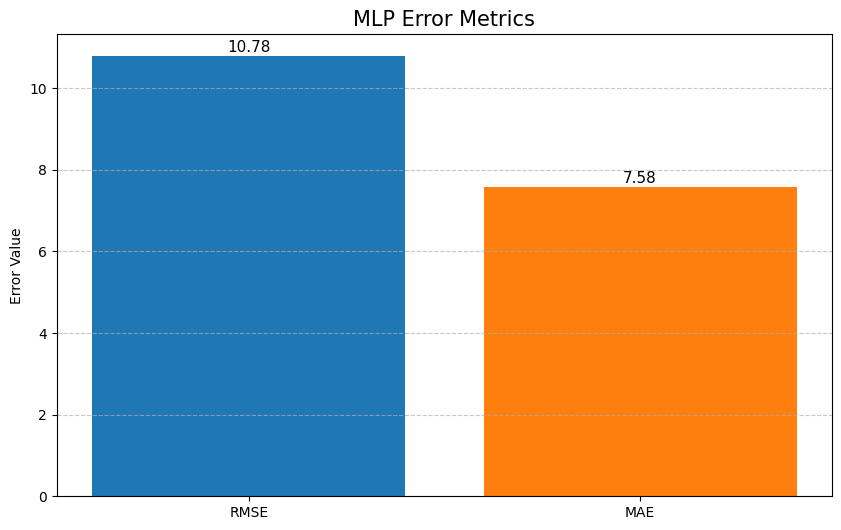

In [548]:
plt.figure(figsize=(10, 6))
metrics = ['RMSE', 'MAE']
values = [ rmse_mlp, mae_mlp]

# Creating bar chart
bars = plt.bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('MLP Error Metrics', fontsize=15)
plt.ylabel('Error Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontsize=11)

plt.show()

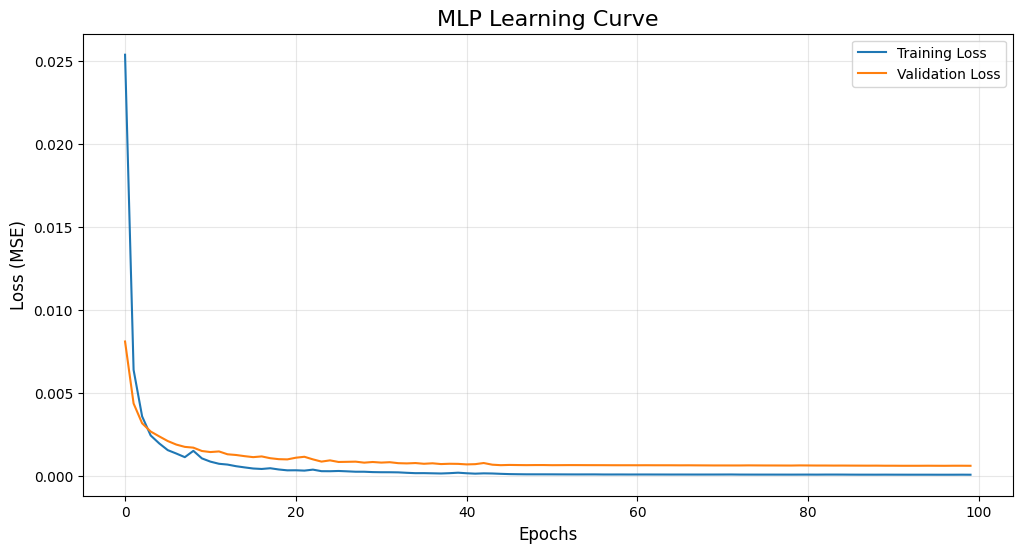

In [534]:
# Plot learning curve
plt.figure(figsize=(12, 6))
plt.plot(mlp_history.history['loss'], label='Training Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('MLP Learning Curve', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

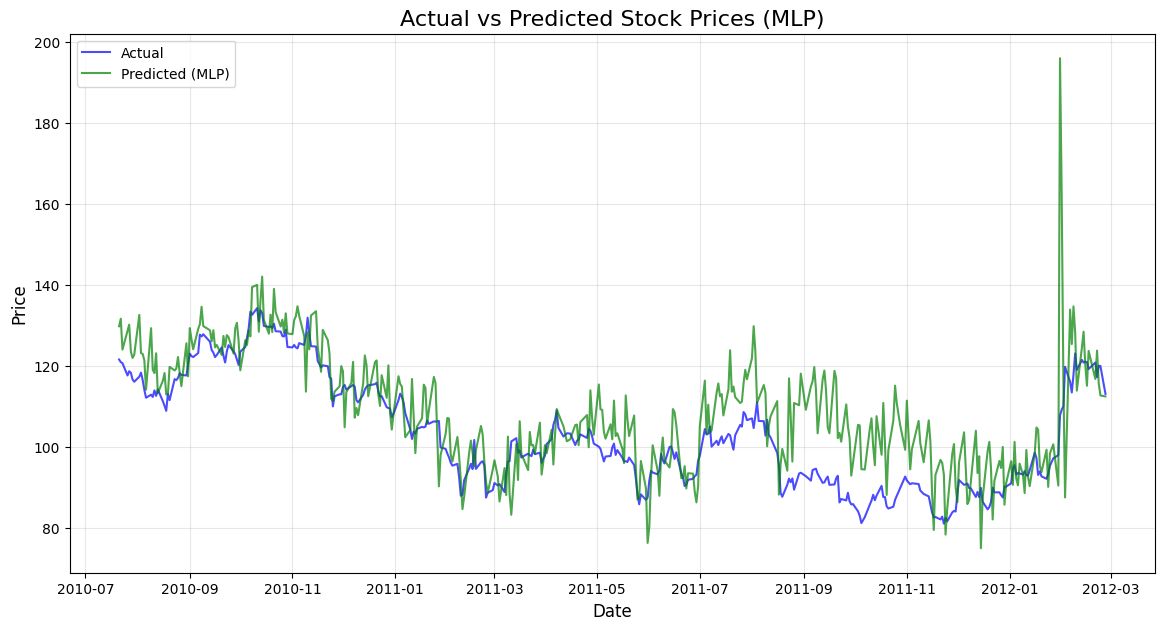

In [535]:
# Plot predictions vs actual
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue', alpha=0.7)
plt.plot(y_test.index, y_pred_mlp, label='Predicted (MLP)', color='green', alpha=0.7)
plt.title('Actual vs Predicted Stock Prices (MLP)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Recurrent Neural Network (RNN)

In [536]:
X_train_nn_rnn = X_train_nn_scaled.reshape(X_train_nn_scaled.shape[0], 1, X_train_nn_scaled.shape[1])
X_val_rnn = X_val_scaled.reshape(X_val_scaled.shape[0], 1, X_val_scaled.shape[1])
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [537]:
rnn_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(1, X_train_nn_scaled.shape[1])),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [538]:
# Compile model
rnn_model.compile(loss='mean_squared_error', optimizer='adam')
rnn_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                  │ (None, 1, 50)          │        13,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 1, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,051 (211.14 KB)

 Trainable params: 54,051 (211.14 KB)

 Non-trainable params: 0 (0.00 B)

In [539]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=50,
    restore_best_weights=True,
    verbose=1
)

In [540]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=50,
    min_lr=0.0001,
    verbose=1
)

In [541]:
# Train RNN model
rnn_history = rnn_model.fit(
    X_train_nn_rnn, y_train_nn_scaled,
    validation_data=(X_val_rnn, y_val_scaled),
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 68s 404ms/step - loss: 0.1157 - val_loss: 0.0101 - learning_rate: 0.0010
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0458 - val_loss: 9.7987e-04 - learning_rate: 0.0010
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0042 - val_loss: 0.0020 - learning_rate: 0.0010
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 9.8185e-04 - val_loss: 0.0014 - learning_rate: 0.0010
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 5.5580e-04 - val_loss: 8.0745e-04 - learning_rate: 0.0010
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 4.1235e-04 - val_loss: 7.1834e-04 - learning_rate: 0.0010
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 3.1005e-04 - val_loss: 5.6484e-04 - learning_rate: 0.0010
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 2.6160e-04 - val_loss: 4.4668e-04 - learning_rate: 0.0010
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 2.1479e-04 - val_l

In [542]:
# Predictions
y_pred_rnn_train_scaled = rnn_model.predict(X_train_rnn)
y_pred_rnn_scaled = rnn_model.predict(X_test_rnn)

51/51 ━━━━━━━━━━━━━━━━━━━━ 15s 144ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [543]:
# Inverse transform predictions
y_pred_rnn_train = y_scaler.inverse_transform(y_pred_rnn_train_scaled).flatten()
y_pred_rnn = y_scaler.inverse_transform(y_pred_rnn_scaled).flatten()

In [544]:
rmse_rnn = np.sqrt(mean_squared_error(y_test, y_pred_rnn))
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)

In [545]:
print(f"RNN - Test RMSE: {rmse_rnn:.2f}")
print(f"RNN - Test MAE: {mae_rnn:.2f}")

RNN - Test RMSE: 2.80
RNN - Test MAE: 2.14


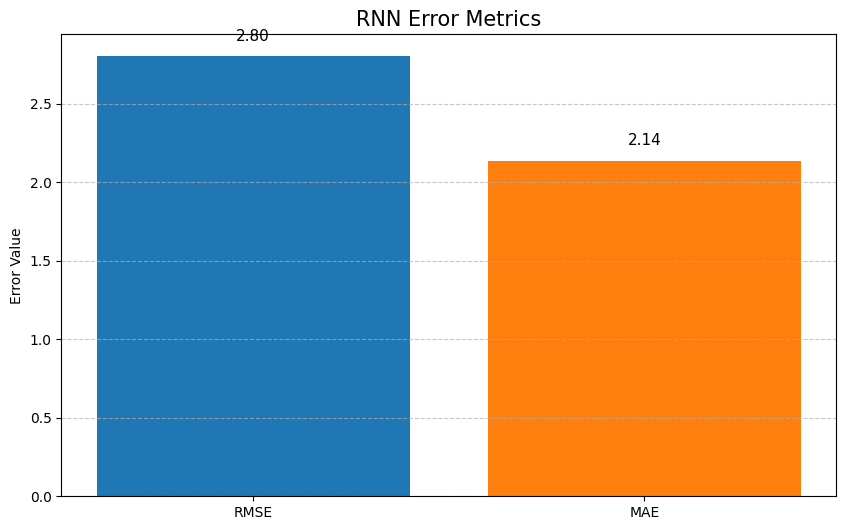

In [549]:
plt.figure(figsize=(10, 6))
metrics = ['RMSE', 'MAE']
values = [ rmse_rnn, mae_rnn]

# Creating bar chart
bars = plt.bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('RNN Error Metrics', fontsize=15)
plt.ylabel('Error Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', fontsize=11)

plt.show()

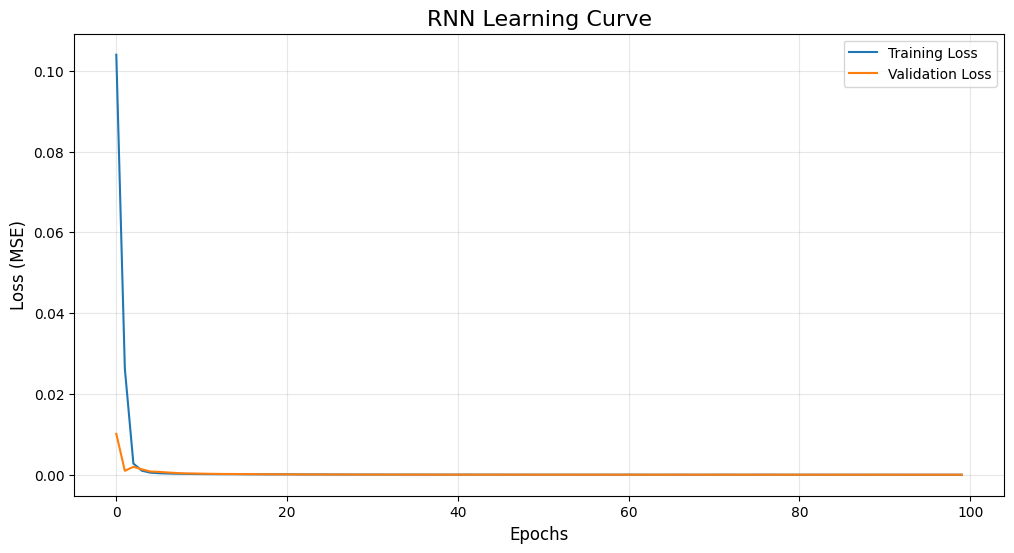

In [546]:
# Plot learning curve
plt.figure(figsize=(12, 6))
plt.plot(rnn_history.history['loss'], label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('RNN Learning Curve', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

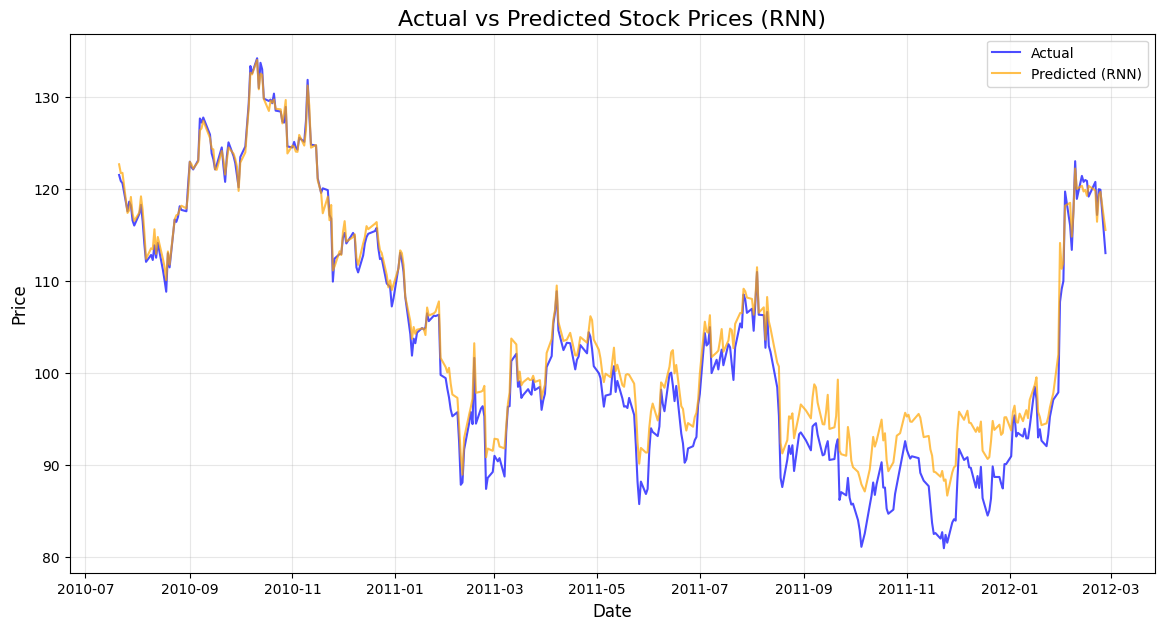

In [547]:
# Plot predictions vs actual
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue', alpha=0.7)
plt.plot(y_test.index, y_pred_rnn, label='Predicted (RNN)', color='orange', alpha=0.7)
plt.title('Actual vs Predicted Stock Prices (RNN)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [551]:
# Plot predictions vs actual
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue', alpha=0.7)
plt.plot(y_test.index, y_pred_mlp, label='Predicted (MLP)', color='green', alpha=0.7)
plt.plot(y_test.index, y_pred_rnn, label='Predicted (RNN)', color='orange', alpha=0.7)
plt.title('Actual vs Predicted(RNN) vs Predicted(MLP)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()